In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist


In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [13]:
model1 = Sequential([
    Flatten(input_shape=(28, 28)),           
    Dense(128, activation='relu'),           
    Dense(64, activation='relu'),            
    Dense(10, activation='softmax')          
])


In [14]:
model2 = Sequential([
    Flatten(input_shape=(28, 28)),           
    Dense(512, activation='relu'),           
    Dropout(0.2),
    Dense(256, activation='relu'),            
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')          
])


In [15]:
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)

model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)


In [20]:

history1 = model1.fit(
    x_train, y_train,
    epochs=5,                    
    batch_size=32,
    validation_split=0.1        
)
'''    
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)
'''
    
history2 = model2.fit(
    x_train, y_train,
    epochs=20,                    
    batch_size=64,
    validation_split=0.1,
    #callbacks=[early_stop]      
)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9890 - loss: 0.0327 - val_accuracy: 0.9802 - val_loss: 0.0788
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9907 - loss: 0.0271 - val_accuracy: 0.9800 - val_loss: 0.0890
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9935 - loss: 0.0191 - val_accuracy: 0.9770 - val_loss: 0.0934
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9933 - loss: 0.0203 - val_accuracy: 0.9795 - val_loss: 0.0872
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9952 - loss: 0.0144 - val_accuracy: 0.9800 - val_loss: 0.1000
Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9928 - loss: 0.0237 - val_accuracy: 0.9848 - val_loss: 0.0751
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9927 - loss: 0.0249 - val_accuracy: 0.9842 - val_loss: 0.0677
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9931 - loss: 0.0213 

In [26]:
test_loss1, test_acc1 = model1.evaluate(x_test, y_test)
print(f"Model 1 Test accuracy: {test_acc1:.4f}")

test_loss2, test_acc2 = model2.evaluate(x_test, y_test)
print(f"Model 2 Test accuracy: {test_acc2:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9716 - loss: 0.1109
Model 1 Test accuracy: 0.9759
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9778 - loss: 0.1161
Model 2 Test accuracy: 0.9823


In [22]:
predictions1 = model1.predict(x_test)
predictions2 = model2.predict(x_test)
predicted_labels1 = np.argmax(predictions1, axis=1)
predicted_labels2 = np.argmax(predictions2, axis=1)
true_labels = y_test

import random
indices = random.sample(range(len(x_test)), 10)

print(predicted_labels1[indices])
print(predicted_labels2[indices])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[4 7 9 0 5 6 4 1 6 8]
[9 7 9 0 5 6 4 1 6 8]


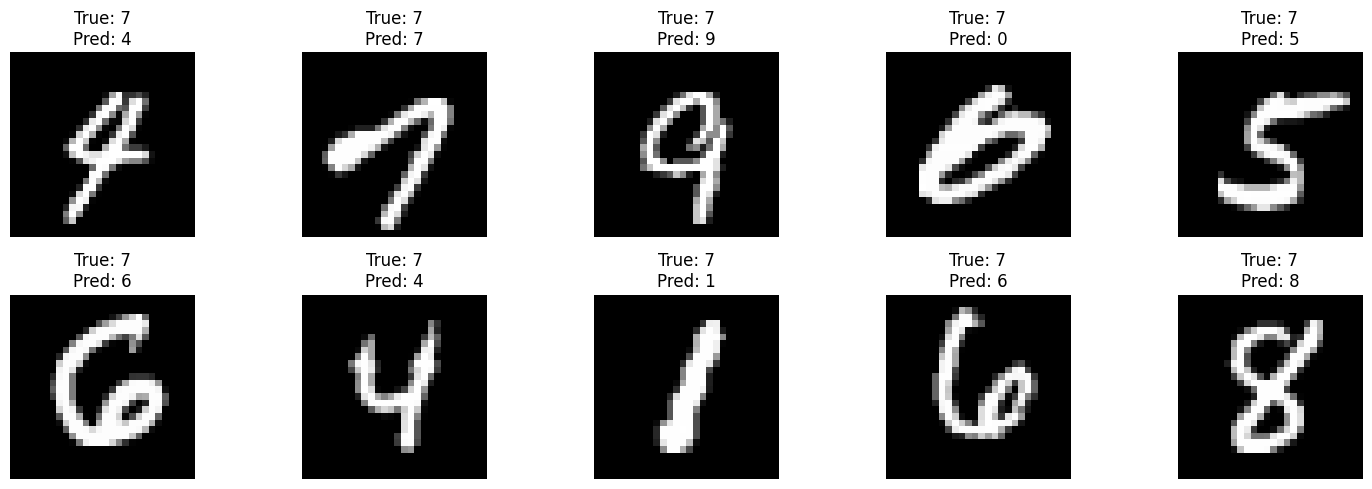

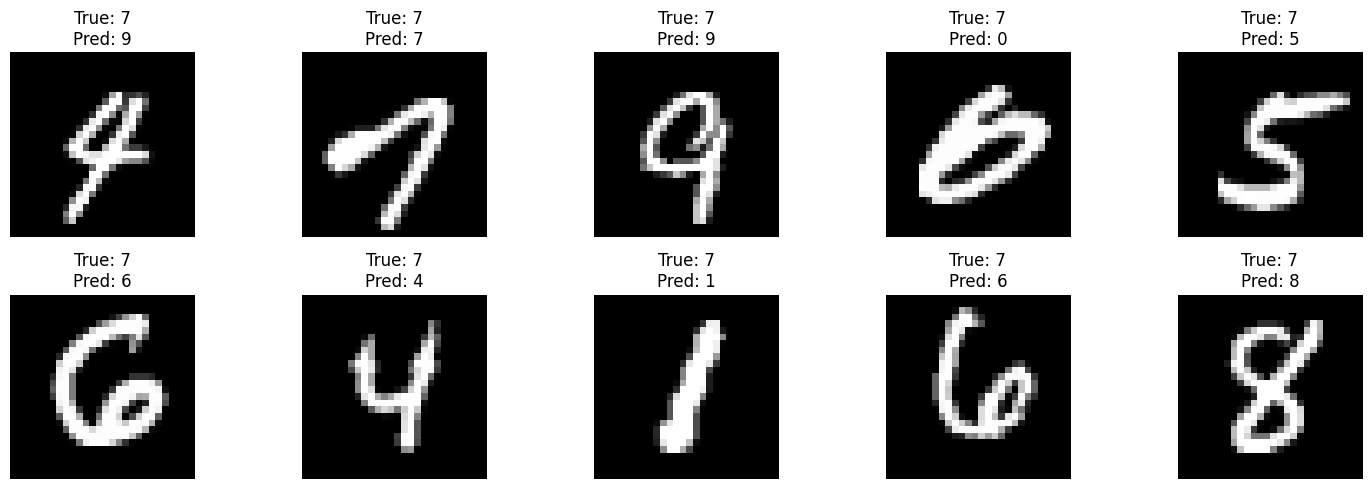

In [23]:
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {np.argmax(true_labels)}\nPred: {predicted_labels1[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {np.argmax(true_labels)}\nPred: {predicted_labels2[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
